In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=columns)


In [ ]:

print("Missing values in each column:\n", df.isnull().sum())

for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")

le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

print(df.head())


Missing values in each column:
 buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64
Unique values in buying: ['vhigh' 'high' 'med' 'low']
Unique values in maint: ['vhigh' 'high' 'med' 'low']
Unique values in doors: ['2' '3' '4' '5more']
Unique values in persons: ['2' '4' 'more']
Unique values in lug_boot: ['small' 'med' 'big']
Unique values in safety: ['low' 'med' 'high']
Unique values in class: ['unacc' 'acc' 'vgood' 'good']
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


            buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      1.500000     1.500000     1.500000     1.000000     1.000000   
std       1.118358     1.118358     1.118358     0.816733     0.816733   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.750000     0.750000     0.750000     0.000000     0.000000   
50%       1.500000     1.500000     1.500000     1.000000     1.000000   
75%       2.250000     2.250000     2.250000     2.000000     2.000000   
max       3.000000     3.000000     3.000000     2.000000     2.000000   

            safety        class  
count  1728.000000  1728.000000  
mean      1.000000     1.553241  
std       0.816733     0.875948  
min       0.000000     0.000000  
25%       0.000000     1.000000  
50%       1.000000     2.000000  
75%       2.000000     2.000000  
max       2.000000     3.000000  

Correlation Matrix:
      

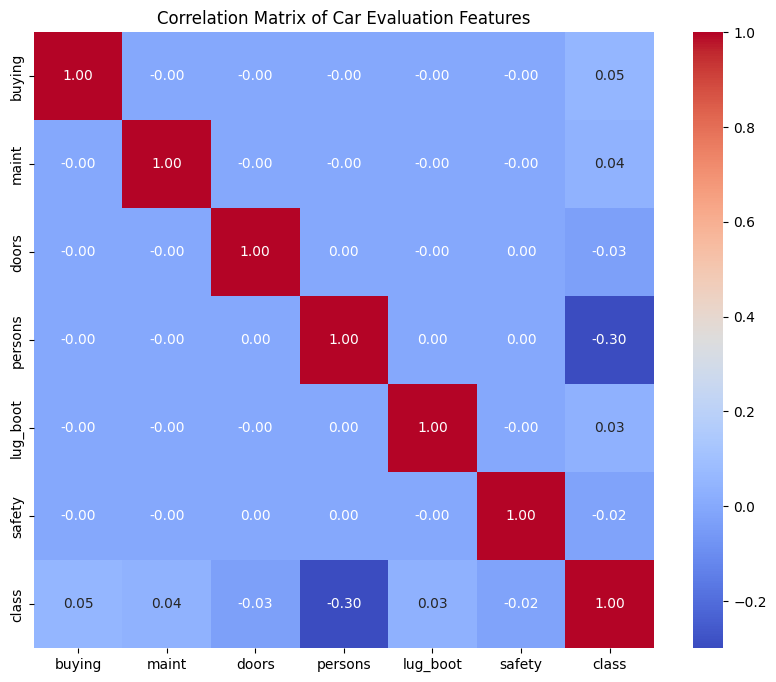

In [ ]:
print(df.describe())

correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Car Evaluation Features')
plt.show()


In [ ]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=4)
rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]
print(f"Selected features: {selected_features}")

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)


Selected features: Index(['maint', 'persons', 'lug_boot', 'safety'], dtype='object')


In [ ]:
# Define base models to train and evaluate
base_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Define ensemble models
ensemble_models = {
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Bagging': BaggingClassifier(n_estimators=50, random_state=42)
}

# Combine base and ensemble models
all_models = {**base_models, **ensemble_models}

def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1 Score': f1_score(y_test, y_pred, average='weighted')
        }
        print(f"{name} - Accuracy: {results[name]['Accuracy']:.4f}")
    return results

# Evaluate base models using all features
print("\nEvaluation of base models using all features:")
base_results_all_features = evaluate_models(base_models, X_train_scaled, X_test_scaled, y_train, y_test)

# Evaluate base models using selected features
print("\nEvaluation of base models using selected features:")
base_results_selected_features = evaluate_models(base_models, X_train_selected_scaled, X_test_selected_scaled, y_train, y_test)

# Evaluate ensemble models using all features
print("\nEvaluation of ensemble models using all features:")
ensemble_results_all_features = evaluate_models(ensemble_models, X_train_scaled, X_test_scaled, y_train, y_test)

# Evaluate ensemble models using selected features
print("\nEvaluation of ensemble models using selected features:")
ensemble_results_selected_features = evaluate_models(ensemble_models, X_train_selected_scaled, X_test_selected_scaled, y_train, y_test)



Evaluation of base models using all features:
Logistic Regression - Accuracy: 0.6628


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest - Accuracy: 0.9672
Decision Tree - Accuracy: 0.9711
SVM - Accuracy: 0.9133

Evaluation of base models using selected features:
Logistic Regression - Accuracy: 0.6647


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest - Accuracy: 0.7919
Decision Tree - Accuracy: 0.8035


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM - Accuracy: 0.8170

Evaluation of ensemble models using all features:
AdaBoost - Accuracy: 0.7765
Bagging - Accuracy: 0.9730

Evaluation of ensemble models using selected features:
AdaBoost - Accuracy: 0.7437
Bagging - Accuracy: 0.7919


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Add stacking classifier with Random Forest as final estimator
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('ada', AdaBoostClassifier(n_estimators=50, random_state=42)),
        ('bagging', BaggingClassifier(n_estimators=50, random_state=42))
    ],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

# Train and evaluate stacking classifier using all features
stacking_clf.fit(X_train_scaled, y_train)
y_pred_stacking_all = stacking_clf.predict(X_test_scaled)
stacking_results_all = {
    'Accuracy': accuracy_score(y_test, y_pred_stacking_all),
    'Precision': precision_score(y_test, y_pred_stacking_all, average='weighted'),
    'Recall': recall_score(y_test, y_pred_stacking_all, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_stacking_all, average='weighted')
}
print("\nStacking Classifier with all features - Accuracy: {:.4f}".format(stacking_results_all['Accuracy']))
print("Stacking Classifier with all features - Precision: {:.4f}".format(stacking_results_all['Precision']))
print("Stacking Classifier with all features - Recall: {:.4f}".format(stacking_results_all['Recall']))
print("Stacking Classifier with all features - F1 Score: {:.4f}".format(stacking_results_all['F1 Score']))

# Train and evaluate stacking classifier using selected features
stacking_clf.fit(X_train_selected_scaled, y_train)
y_pred_stacking_selected = stacking_clf.predict(X_test_selected_scaled)
stacking_results_selected = {
    'Accuracy': accuracy_score(y_test, y_pred_stacking_selected),
    'Precision': precision_score(y_test, y_pred_stacking_selected, average='weighted'),
    'Recall': recall_score(y_test, y_pred_stacking_selected, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_stacking_selected, average='weighted')
}
print("Stacking Classifier with selected features - Accuracy: {:.4f}".format(stacking_results_selected['Accuracy']))
print("Stacking Classifier with selected features - Precision: {:.4f}".format(stacking_results_selected['Precision']))
print("Stacking Classifier with selected features - Recall: {:.4f}".format(stacking_results_selected['Recall']))
print("Stacking Classifier with selected features - F1 Score: {:.4f}".format(stacking_results_selected['F1 Score']))



Stacking Classifier with all features - Accuracy: 0.9692
Stacking Classifier with all features - Precision: 0.9713
Stacking Classifier with all features - Recall: 0.9692
Stacking Classifier with all features - F1 Score: 0.9697
Stacking Classifier with selected features - Accuracy: 0.8054
Stacking Classifier with selected features - Precision: 0.7758
Stacking Classifier with selected features - Recall: 0.8054
Stacking Classifier with selected features - F1 Score: 0.7862


In [ ]:
# Combine all results into one dictionary
all_results_all_features = {**base_results_all_features, **ensemble_results_all_features, 'Stacking': stacking_results_all}
all_results_selected_features = {**base_results_selected_features, **ensemble_results_selected_features, 'Stacking': stacking_results_selected}

# Find the best model based on each metric
best_models_all_features = {metric: max(all_results_all_features, key=lambda k: all_results_all_features[k][metric]) for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']}
best_models_selected_features = {metric: max(all_results_selected_features, key=lambda k: all_results_selected_features[k][metric]) for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']}

# Print the best models based on each metric
print("\nBest models using all features:")
for metric, model in best_models_all_features.items():
    print(f"{metric}: {model} with {all_results_all_features[model][metric]:.4f}")
print("\nBest models using selected features:")
for metric, model in best_models_selected_features.items():
    print(f"{metric}: {model} with {all_results_selected_features[model][metric]:.4f}")



Best models using all features:
Accuracy: Bagging with 0.9730
Precision: Bagging with 0.9743
Recall: Bagging with 0.9730
F1 Score: Bagging with 0.9735

Best models using selected features:
Accuracy: SVM with 0.8170
Precision: Decision Tree with 0.7771
Recall: SVM with 0.8170
F1 Score: SVM with 0.7865


In [ ]:
# Find the highest performing model based on accuracy
highest_model_name = best_models_all_features['Accuracy']
highest_model = all_models[highest_model_name]

# Train and evaluate the highest performing model with all features
highest_model.fit(X_train_scaled, y_train)
predictions_highest = highest_model.predict(X_test_scaled)
accuracy_highest = accuracy_score(y_test, predictions_highest)

# Stacking Classifier
stacking_model = StackingClassifier(estimators=[(highest_model_name, highest_model)], final_estimator=RandomForestClassifier(n_estimators=100, random_state=42))

# Train and evaluate stacking classifier using all features
stacking_model.fit(X_train_scaled, y_train)
y_pred_stacking_all = stacking_model.predict(X_test_scaled)
stacking_results_all = {
    'Accuracy': accuracy_score(y_test, y_pred_stacking_all),
    'Precision': precision_score(y_test, y_pred_stacking_all, average='weighted'),
    'Recall': recall_score(y_test, y_pred_stacking_all, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_stacking_all, average='weighted')
}
print("\nStacking Classifier with highest performing model - Accuracy: {:.4f}".format(stacking_results_all['Accuracy']))
print("Stacking Classifier with highest performing model - Precision: {:.4f}".format(stacking_results_all['Precision']))
print("Stacking Classifier with highest performing model - Recall: {:.4f}".format(stacking_results_all['Recall']))
print("Stacking Classifier with highest performing model - F1 Score: {:.4f}".format(stacking_results_all['F1 Score']))



Stacking Classifier with highest performing model - Accuracy: 0.9653
Stacking Classifier with highest performing model - Precision: 0.9673
Stacking Classifier with highest performing model - Recall: 0.9653
Stacking Classifier with highest performing model - F1 Score: 0.9657


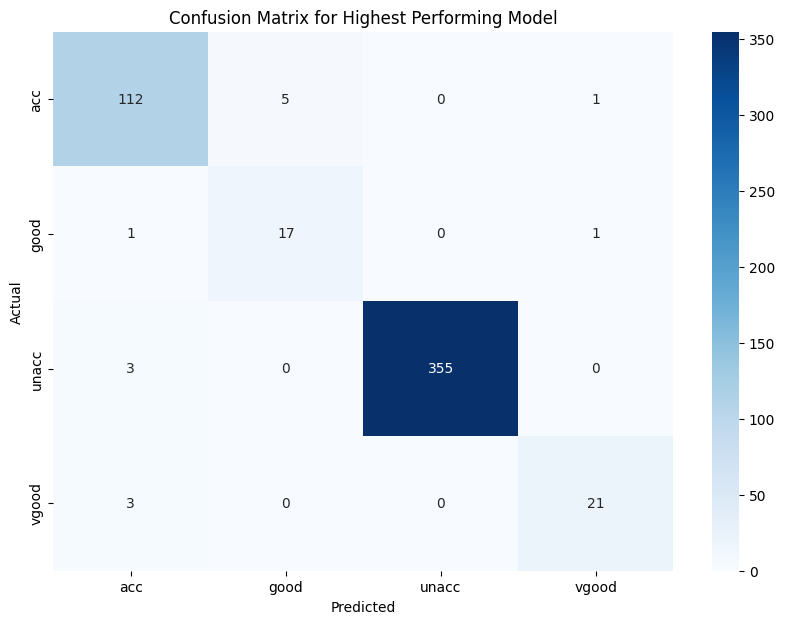

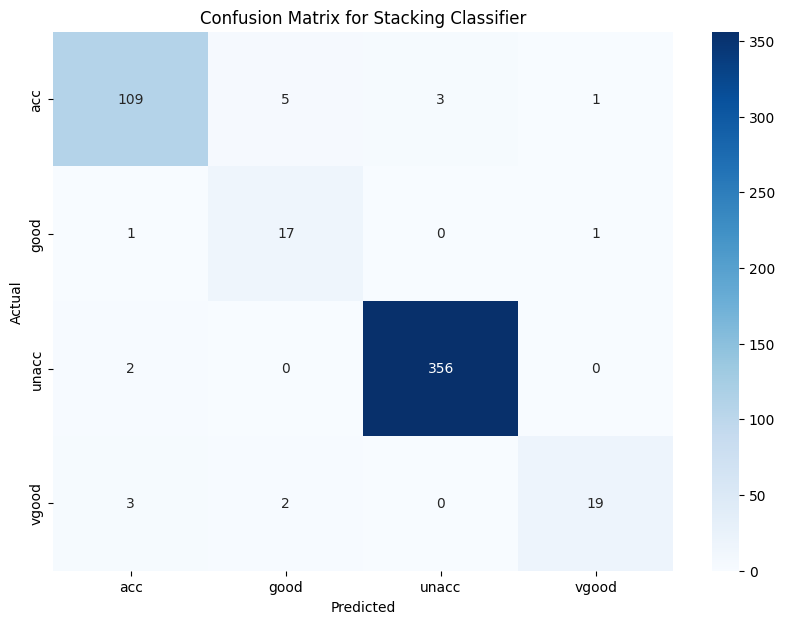

In [ ]:
# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrix for the highest performing model
plot_confusion_matrix(y_test, predictions_highest, 'Confusion Matrix for Highest Performing Model')

# Plot confusion matrix for the stacking classifier
plot_confusion_matrix(y_test, y_pred_stacking_all, 'Confusion Matrix for Stacking Classifier')



Evaluation of stacking, bagging, and boosting classifiers using the highest performing model:
Stacking Accuracy: 0.9653
AdaBoost Accuracy: 0.9653
Bagging Accuracy: 0.9672


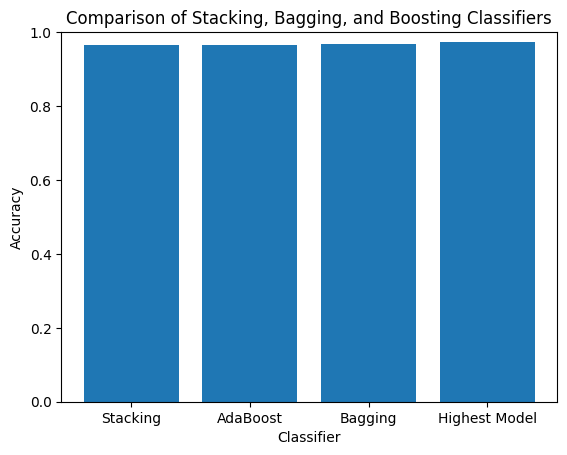

In [ ]:
# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(estimator=highest_model, n_estimators=500, random_state=42)
adaboost_model.fit(X_train_scaled, y_train)
adaboost_accuracy = adaboost_model.score(X_test_scaled, y_test)

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=highest_model, n_estimators=500, random_state=42)
bagging_model.fit(X_train_scaled, y_train)
bagging_accuracy = bagging_model.score(X_test_scaled, y_test)

print("\nEvaluation of stacking, bagging, and boosting classifiers using the highest performing model:")
print(f"Stacking Accuracy: {stacking_results_all['Accuracy']:.4f}")
print(f"AdaBoost Accuracy: {adaboost_accuracy:.4f}")
print(f"Bagging Accuracy: {bagging_accuracy:.4f}")

# Plotting the results
accuracies = {
    'Stacking': stacking_results_all['Accuracy'],
    'AdaBoost': adaboost_accuracy,
    'Bagging': bagging_accuracy,
    'Highest Model': accuracy_highest
}

plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Stacking, Bagging, and Boosting Classifiers')
plt.ylim(0, 1)
plt.show()


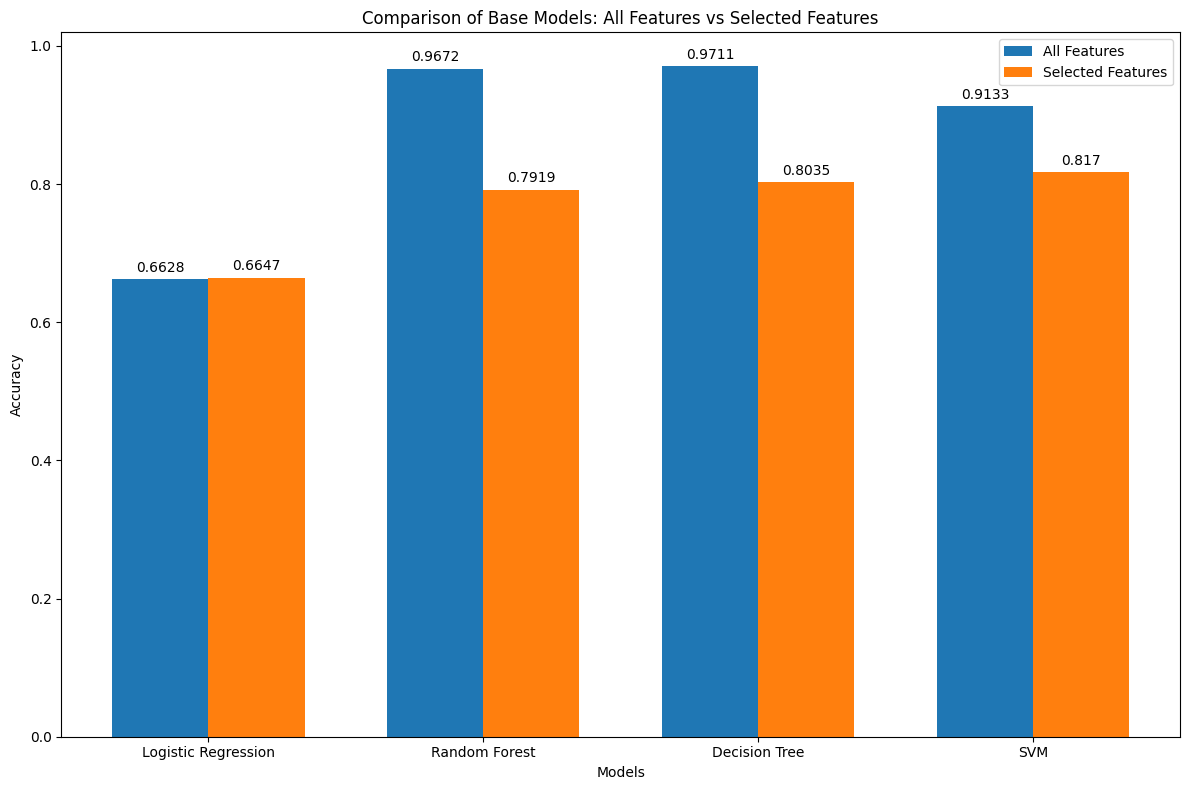

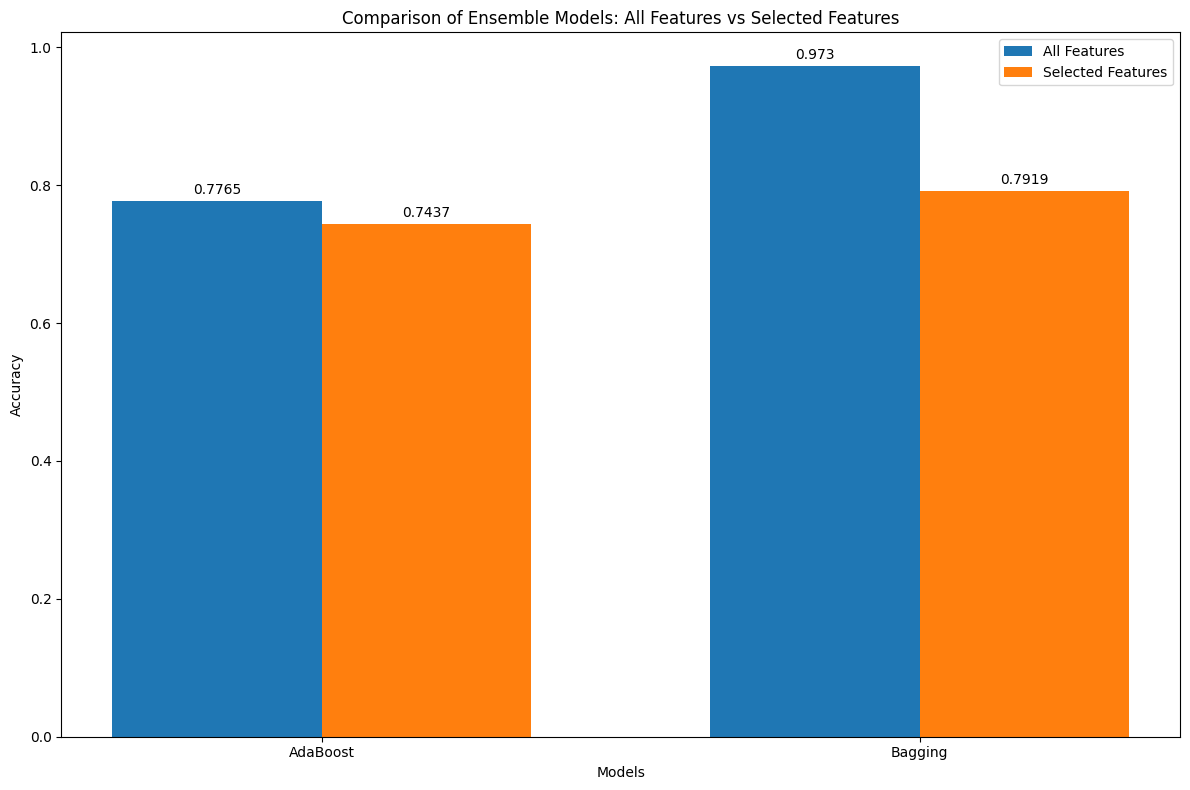

In [ ]:
# Function to plot the comparison between all features and selected features
def plot_comparison(results_all, results_selected, title):
    models = list(results_all.keys())
    accuracies_all = [results_all[model]['Accuracy'] for model in models]
    accuracies_selected = [results_selected[model]['Accuracy'] for model in models]

    x = np.arange(len(models))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 8))
    bars1 = ax.bar(x - width/2, accuracies_all, width, label='All Features')
    bars2 = ax.bar(x + width/2, accuracies_selected, width, label='Selected Features')

    ax.set_xlabel('Models')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()

    def autolabel(bars):
        """Attach a text label above each bar in *bars*, displaying its height."""
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(round(height, 4)),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bars1)
    autolabel(bars2)

    fig.tight_layout()
    plt.show()

# Plot the comparison between models using all features and selected features
plot_comparison(base_results_all_features, base_results_selected_features, 'Comparison of Base Models: All Features vs Selected Features')
plot_comparison(ensemble_results_all_features, ensemble_results_selected_features, 'Comparison of Ensemble Models: All Features vs Selected Features')
